# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key  + "&units=imperial" + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=2893041d74e867ee15acd5a4e5ed92ed&units=imperial&q=


In [17]:
count = 0
city_name = []
clouds = []
latitude = []
max_temp = []
long = []
country = []
humidity = []
wind_speed = []
date = []

# Loop through each city
for city in cities:
    city_url = query_url + city
    try:
        response = requests.get(city_url).json()
        #pprint(response)
        count+= 1       
        city_name.append(response['name'])
        clouds.append(response['clouds']['all'])
        latitude.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])

        print(f"{city} found! this is city number {count}")
        
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("Missing Information, skipping this city")
        pass

avarua found! this is city number 1
kapaa found! this is city number 2
arraial do cabo found! this is city number 3
fairbanks found! this is city number 4
atuona found! this is city number 5
mar del plata found! this is city number 6
albany found! this is city number 7
cape town found! this is city number 8
qaanaaq found! this is city number 9
rikitea found! this is city number 10
vaini found! this is city number 11
ushuaia found! this is city number 12
antofagasta found! this is city number 13
Missing Information, skipping this city
krasnokamensk found! this is city number 15
Missing Information, skipping this city
butaritari found! this is city number 17
opuwo found! this is city number 18
bethel found! this is city number 19
nordhausen found! this is city number 20
salalah found! this is city number 21
georgetown found! this is city number 22
Missing Information, skipping this city
Missing Information, skipping this city
olinda found! this is city number 25
ixtapa found! this is cit

alta floresta found! this is city number 207
abu dhabi found! this is city number 208
dakar found! this is city number 209
tarko-sale found! this is city number 210
oneonta found! this is city number 211
pleasanton found! this is city number 212
cap malheureux found! this is city number 213
rocha found! this is city number 214
sovetskiy found! this is city number 215
fukuma found! this is city number 216
klaksvik found! this is city number 217
cairns found! this is city number 218
hovd found! this is city number 219
nabire found! this is city number 220
viedma found! this is city number 221
egvekinot found! this is city number 222
okhotsk found! this is city number 223
vila franca do campo found! this is city number 224
sistranda found! this is city number 225
nishihara found! this is city number 226
pacific grove found! this is city number 227
the valley found! this is city number 228
tevaitoa found! this is city number 229
gardelegen found! this is city number 230
los llanos de arida

port blair found! this is city number 410
warner robins found! this is city number 411
daru found! this is city number 412
lavrentiya found! this is city number 413
tambacounda found! this is city number 414
ginir found! this is city number 415
arlit found! this is city number 416
wenatchee found! this is city number 417
dunedin found! this is city number 418
Missing Information, skipping this city
maryborough found! this is city number 420
iringa found! this is city number 421
agadez found! this is city number 422
oranjemund found! this is city number 423
clyde river found! this is city number 424
nome found! this is city number 425
hamilton found! this is city number 426
tiksi found! this is city number 427
tahoua found! this is city number 428
Missing Information, skipping this city
tuatapere found! this is city number 430
mancio lima found! this is city number 431
houston found! this is city number 432
haflong found! this is city number 433
misratah found! this is city number 434
e

lisala found! this is city number 616
mountain home found! this is city number 617
lingao found! this is city number 618
uto found! this is city number 619
alice springs found! this is city number 620
pangkalanbuun found! this is city number 621
Missing Information, skipping this city
beni found! this is city number 623
zuenoula found! this is city number 624
ejido found! this is city number 625
coquimbo found! this is city number 626
Missing Information, skipping this city
broken hill found! this is city number 628
isiro found! this is city number 629
tsaratanana found! this is city number 630
insar found! this is city number 631
cachoeira do sul found! this is city number 632
santo domingo found! this is city number 633
kota kinabalu found! this is city number 634
nicoya found! this is city number 635


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
city_weather_df = pd.DataFrame({
    'City': city_name,
    'Cloudiness': clouds,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': latitude,
    'Lng': long,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed
})
city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Avarua,75,CK,1586393631,84,-21.21,-159.78,86.00,20.80
1,Kapaa,40,US,1586393471,69,22.08,-159.32,80.60,11.41
2,Arraial do Cabo,95,BR,1586393350,77,-22.97,-42.03,73.22,13.58
3,Fairbanks,75,US,1586393471,36,64.84,-147.72,32.00,9.17
4,Atuona,11,PF,1586393594,79,-9.80,-139.03,82.67,13.53
...,...,...,...,...,...,...,...,...,...
585,Insar,24,RU,1586393630,89,53.87,44.37,41.07,7.49
586,Cachoeira do Sul,1,BR,1586393406,73,-30.04,-52.89,54.25,3.87
587,Santo Domingo,75,DO,1586393553,78,18.50,-69.99,80.60,6.93
588,Kota Kinabalu,20,MY,1586393403,74,5.97,116.07,84.20,9.17


In [19]:
city_weather_df.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

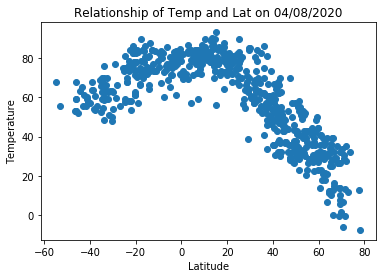

In [20]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Relationship of Temp and Lat on 04/08/2020')
plt.show()

#### Latitude vs. Humidity Plot

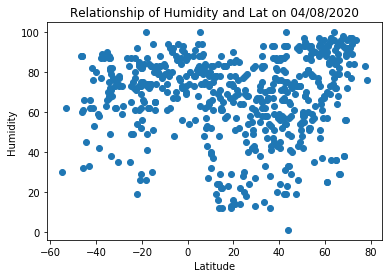

In [21]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Relationship of Humidity and Lat on 04/08/2020')
plt.show()

#### Latitude vs. Cloudiness Plot

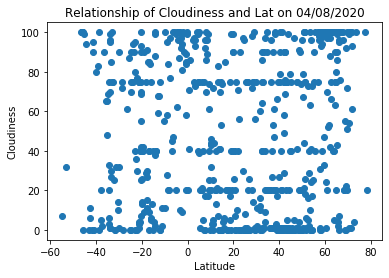

In [22]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Relationship of Cloudiness and Lat on 04/08/2020')
plt.show()

#### Latitude vs. Wind Speed Plot

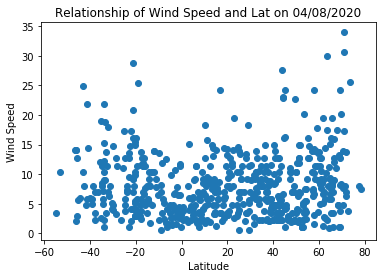

In [23]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Relationship of Wind Speed and Lat on 04/08/2020')
plt.show()

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots 
 
def linear_regression(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames
#Northern Hemisphere (greater than or equal to 0 degrees latitude):
northern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] >= 0)]
northern_hemi_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Kapaa,40,US,1586393471,69,22.08,-159.32,80.60,11.41
3,Fairbanks,75,US,1586393471,36,64.84,-147.72,32.00,9.17
6,Albany,90,US,1586393473,54,42.60,-73.97,53.60,12.75
8,Qaanaaq,100,GL,1586393597,83,77.48,-69.36,12.96,8.03
13,Krasnokamensk,96,RU,1586393387,48,50.10,118.04,37.83,3.44
...,...,...,...,...,...,...,...,...,...
583,Isiro,97,CD,1586393629,73,2.77,27.62,69.37,1.86
585,Insar,24,RU,1586393630,89,53.87,44.37,41.07,7.49
587,Santo Domingo,75,DO,1586393553,78,18.50,-69.99,80.60,6.93
588,Kota Kinabalu,20,MY,1586393403,74,5.97,116.07,84.20,9.17


In [26]:
#and Southern Hemisphere (less than 0 degrees latitude):
southern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] <= 0)]
southern_hemi_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Avarua,75,CK,1586393631,84,-21.21,-159.78,86.00,20.80
2,Arraial do Cabo,95,BR,1586393350,77,-22.97,-42.03,73.22,13.58
4,Atuona,11,PF,1586393594,79,-9.80,-139.03,82.67,13.53
5,Mar del Plata,20,AR,1586393146,87,-38.00,-57.56,54.00,3.36
7,Cape Town,1,ZA,1586393595,81,-33.93,18.42,59.00,1.12
...,...,...,...,...,...,...,...,...,...
577,Pangkalanbuun,81,ID,1586393627,91,-2.68,111.62,76.06,4.27
581,Coquimbo,90,CL,1586393629,77,-29.95,-71.34,62.60,4.70
582,Broken Hill,0,AU,1586393785,62,-31.95,141.43,59.00,6.93
584,Tsaratanana,9,MG,1586393629,72,-16.78,47.65,70.12,7.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

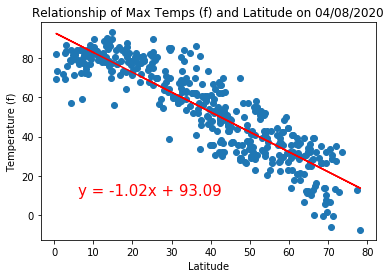

In [35]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Temperature (f)"
title = "Relationship of Max Temps (f) and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

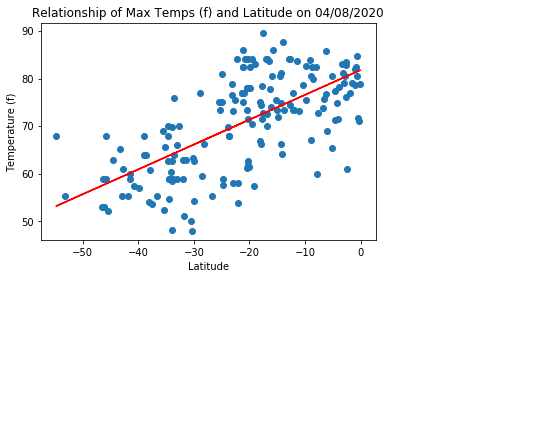

In [36]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Temperature (f)"
title = "Relationship of Max Temps (f) and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

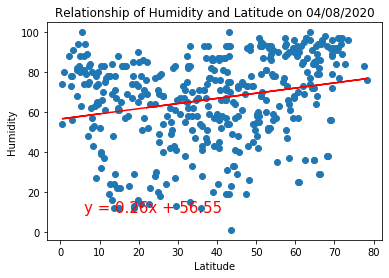

In [29]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
title = "Relationship of Humidity and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

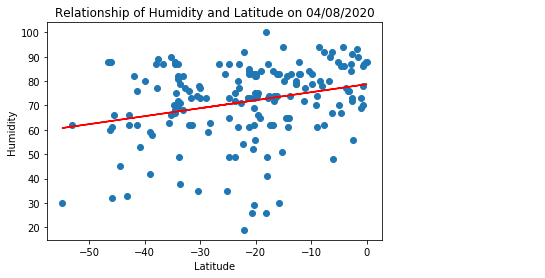

In [30]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
title = "Relationship of Humidity and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

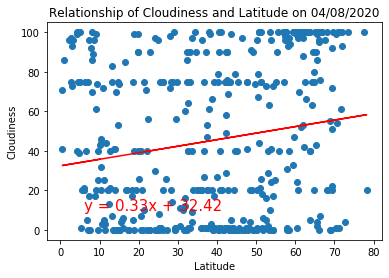

In [31]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
title = "Relationship of Cloudiness and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

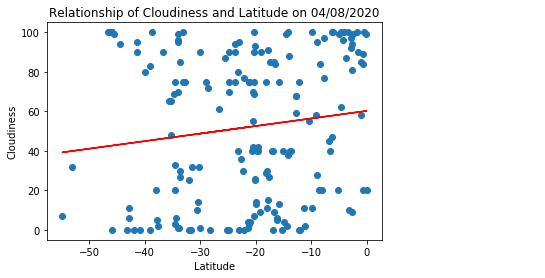

In [32]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
title = "Relationship of Cloudiness and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

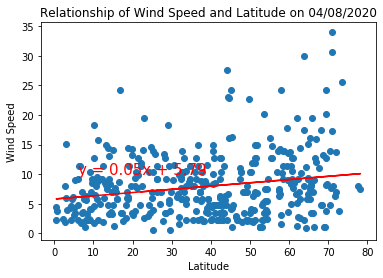

In [33]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
title = "Relationship of Wind Speed and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

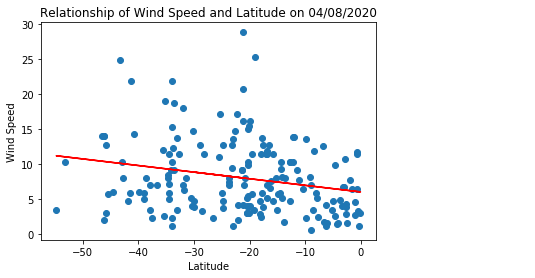

In [34]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
title = "Relationship of Wind Speed and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)